In [3]:
from subprocess import Popen, PIPE, STDOUT
import sys
sys.path.append('../')
import os
import glob
import config
from datetime import datetime
import time
import pymysql.cursors
import pandas as pd

connection = pymysql.connect(host='localhost',
                             user='root',
                             password=config.MYSQL_SERVER_PASSWORD,
                             db='youtubeProjectDB',
                             charset='utf8mb4', # deals with the exotic emojis
                             cursorclass=pymysql.cursors.DictCursor)

sql1 = """SELECT videoId, captionsText FROM captions
         WHERE language='en'
         AND videoId IN 
         (SELECT videoId from search_api WHERE query_q = 'machine+learning' OR query_q = 'scikit');"""


sql2 = """SELECT captions.videoId, captions.captionsText, statistics.durationSeconds FROM captions 
        INNER JOIN statistics
        ON captions.videoId = statistics.videoId
        WHERE captions.language='en'
        AND captions.videoId IN 
        (SELECT videoId from search_api WHERE query_q = 'machine+learning' OR query_q = 'scikit');"""

df = pd.read_sql(sql2, connection)

In [60]:
import spacy
nlp = spacy.load('en')
df['wordCount'] = df['captionsText'].map(lambda x: len(nlp(x)))
df['wordsPerMinute'] = df['wordCount'] / (df['durationSeconds'] / 60)

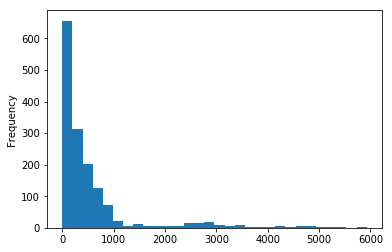

In [72]:
%matplotlib inline
df.durationSeconds.plot(kind='hist', bins=30)

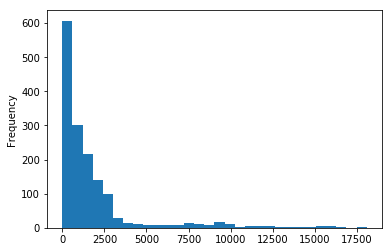

In [73]:
df.wordCount.plot(kind='hist', bins=30)

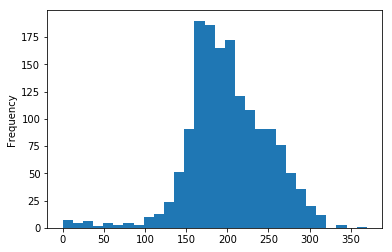

In [74]:
df.wordsPerMinute.plot(kind='hist', bins=30)